In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [2]:
original_dataset = pd.read_csv('/content/drive/My Drive/trans.csv',delimiter=',',header=0)

In [3]:
original_dataset.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

In [4]:
def label_class(row):
    if row['PPI_SINGLE'] == 1:
        return 'single'
    if row['PPI_JOINT'] == 1:
        return 'joint'
    if row['PPI_LCI'] == 1:
        return 'lci'

In [5]:
original_dataset['class'] = original_dataset.apply (lambda row: label_class(row), axis=1)

In [6]:
drop_columns =['Insurance_Description','code','prdt_desc','category','PPI_SINGLE','PPI_JOINT','PPI_LCI']
original_dataset.drop(drop_columns,inplace=True,axis=1)

In [7]:
data_preprocessced = original_dataset

In [8]:
data_ready_for_pipeline_train_test = data_preprocessced[data_preprocessced['PPI'].isin(['1'])]
data_ready_for_pipeline_scoring = data_preprocessced[data_preprocessced['PPI'].isin(['0'])]

In [9]:

data_ready_for_pipeline_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6922 entries, 0 to 16382
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               6922 non-null   int64  
 1   Credit_Score                      6922 non-null   int64  
 2   Final_Grade                       6922 non-null   object 
 3   Term                              6922 non-null   int64  
 4   Net_Advance                       6922 non-null   float64
 5   APR                               6922 non-null   float64
 6   Loan_Type                         6922 non-null   object 
 7   Mosaic                            6922 non-null   int64  
 8   Mosaic_Class                      6922 non-null   int64  
 9   Time_at_Address                   6922 non-null   int64  
 10  Residential_Status                6922 non-null   object 
 11  Telephone_Indicator               6922 non-null   object 
 12  Numbe

In [10]:
drop_columns_for_pipeline_scoring=['PPI','class','Ref']
drop_columns_for_pipeline_train_test=['PPI','Ref']

In [11]:
data_ready_for_pipeline_scoring.drop(drop_columns_for_pipeline_scoring,inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
data_ready_for_pipeline_scoring.shape

(6922, 50)

In [13]:
data_ready_for_pipeline_train_test.drop(drop_columns_for_pipeline_train_test,inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
data_ready_for_pipeline_train_test.shape

(9461, 51)

In [15]:
product_map_status={'lci':1,'single':2,'joint':3}
data_ready_for_pipeline_train_test['class'] = data_ready_for_pipeline_train_test['class'].map(product_map_status)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
y = data_ready_for_pipeline_train_test.pop('class')

In [17]:
X = data_ready_for_pipeline_train_test

In [18]:
X.info()
X.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9461 entries, 1 to 16381
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Credit_Score                      9461 non-null   int64  
 1   Final_Grade                       9461 non-null   object 
 2   Term                              9461 non-null   int64  
 3   Net_Advance                       9461 non-null   float64
 4   APR                               9461 non-null   float64
 5   Loan_Type                         9461 non-null   object 
 6   Mosaic                            9461 non-null   int64  
 7   Mosaic_Class                      9461 non-null   int64  
 8   Time_at_Address                   9461 non-null   int64  
 9   Residential_Status                9461 non-null   object 
 10  Telephone_Indicator               9461 non-null   object 
 11  Number_of_Dependants              9461 non-null   int64  
 12  Marit

(9461, 50)

In [19]:
num_vars =['Credit_Score','Term','Net_Advance','APR','Mosaic','Time_at_Address','Number_of_Dependants','Time_in_Employment','Time_with_Bank','Value_of_Property','Outstanding_Mortgage_Bal','Total_Outstanding_Balances','Bureau_Data___Monthly_Other_Co_R','Age','Total_outstanding_balance__mortg','Total_value__Public_Info___CCJ__','Time_since_most_recent_Public_In','Total_value__CAIS_8_9s','Searches___Total___L6m','Years_on_ER_for_SP','Total_outstanding_balance___excl','Total___of_accounts','Time_since_most_recent_outstandi']
cat_vars=['Final_Grade','Loan_Type','Mosaic_Class','Residential_Status','Telephone_Indicator','Marital_Status','Gender','Employment_Status','Full_Part_Time_Empl_Ind','Perm_Temp_Empl_Ind','Income_Range','Current_Account','ACCESS_Card','VISA_Card','American_Express','Diners_Card','Cheque_Guarantee','Other_Credit_Store_Card','Worst_History_CT','Payment_Method','Total___Public_Info___CCJ____ban','Worst_status_L6m','Worst_CUrrent_Status','__of_status_3_s_L6m','Bankruptcy_Detected__SP_','Total___outstanding_CCJ_s','CIFAS_detected']
print(len(num_vars))
print(len(cat_vars))

23
27


In [20]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in cat_vars:
    X[column] = label.fit_transform(X[column])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 50)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7568, 50)
Number transactions y_train dataset:  (7568,)
Number transactions X_test dataset:  (1893, 50)
Number transactions y_test dataset:  (1893,)


In [22]:

from imblearn.over_sampling import SMOTE
X_train_sm,y_train_sm = SMOTE().fit_resample(X_train,y_train.ravel())
print('After OverSampling, the shape of X_train: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape))


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

After OverSampling, the shape of X_train: (15000, 50)
After OverSampling, the shape of y_train: (15000,) 



In [23]:
y_train.shape

(7568,)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_classifier =GradientBoostingClassifier(n_estimators=20, learning_rate = 0.2, max_features=2, max_depth = 2, random_state = 0)

In [45]:
pipe = make_pipeline(gbt_classifier)
pipe.fit(X_train_sm, y_train_sm.ravel())

Pipeline(memory=None,
         steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.2, loss='deviance',
                                            max_depth=2, max_features=2,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=20,
                                            n_iter_no_change=None,
                                            presort='deprecated',
                                    

In [46]:
y_pred = pipe.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score,classification_report
accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %")
print('Classification report\n {} \n'.format(classification_report(y_test,y_pred)))

The accuracy of the model is 55.800000000000004 %
Classification report
               precision    recall  f1-score   support

           1       0.36      0.35      0.35       397
           2       0.72      0.65      0.69      1264
           3       0.25      0.41      0.31       232

    accuracy                           0.56      1893
   macro avg       0.45      0.47      0.45      1893
weighted avg       0.59      0.56      0.57      1893
 



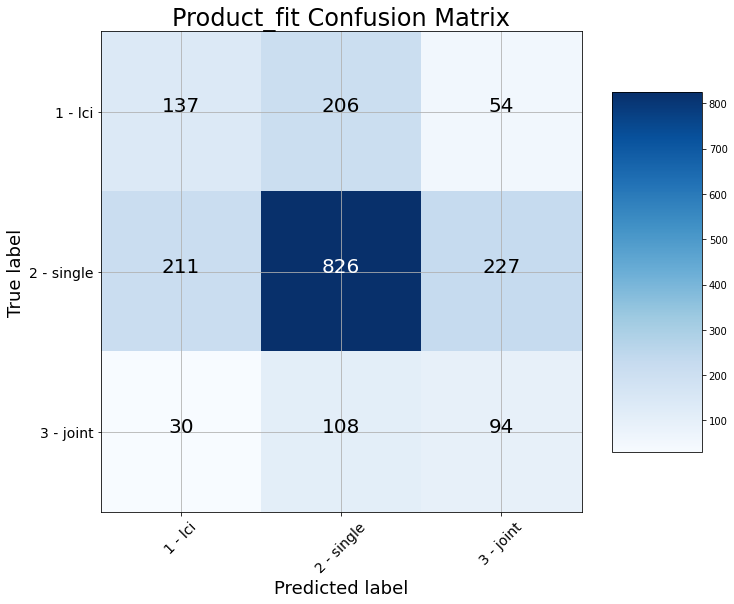

In [48]:
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['1 - lci', '2 - single', '3 - joint'],
                      title = 'Product_fit Confusion Matrix')

In [50]:
print(gbt_classifier.feature_importances_)
print(f" There are {len(gbt_classifier.feature_importances_)} features in total")



[0.00103457 0.0193302  0.01447571 0.00272854 0.00618462 0.00571612
 0.01270445 0.00039786 0.0006208  0.         0.00647624 0.06883145
 0.13983182 0.03698057 0.01635887 0.08159655 0.00719991 0.
 0.15920274 0.00055118 0.01891595 0.00891078 0.00102645 0.00233956
 0.00558097 0.03026206 0.00296598 0.02541693 0.00381909 0.00388645
 0.0058935  0.00813963 0.00186528 0.01514101 0.00099182 0.0139683
 0.00378006 0.02779497 0.02843561 0.01456863 0.04196446 0.01192573
 0.0481524  0.01317625 0.         0.03943128 0.00608773 0.01496558
 0.00139265 0.0189787 ]
 There are 50 features in total


In [51]:
feature_importances = list(zip(X_train, gbt_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: Income_Range                        Importance: 0.1592027400643389
Feature: Marital_Status                      Importance: 0.13983182048557824
Feature: Employment_Status                   Importance: 0.08159654621732391
Feature: Number_of_Dependants                Importance: 0.06883144654739494
Feature: Searches___Total___L6m              Importance: 0.04815239867141262
Feature: Worst_CUrrent_Status                Importance: 0.04196446180317778
Feature: Total___outstanding_CCJ_s           Importance: 0.03943128419823083
Feature: Gender                              Importance: 0.036980573351524396
Feature: Other_Credit_Store_Card             Importance: 0.030262060520703325
Feature: Total_value__CAIS_8_9s              Importance: 0.02843561135697731
Feature: Time_since_most_recent_Public_In    Importance: 0.027794972230778394
Feature: Value_of_Property                   Importance: 0.02541693242738503
Feature: Final_Grade                         Importance: 0.019330203112837

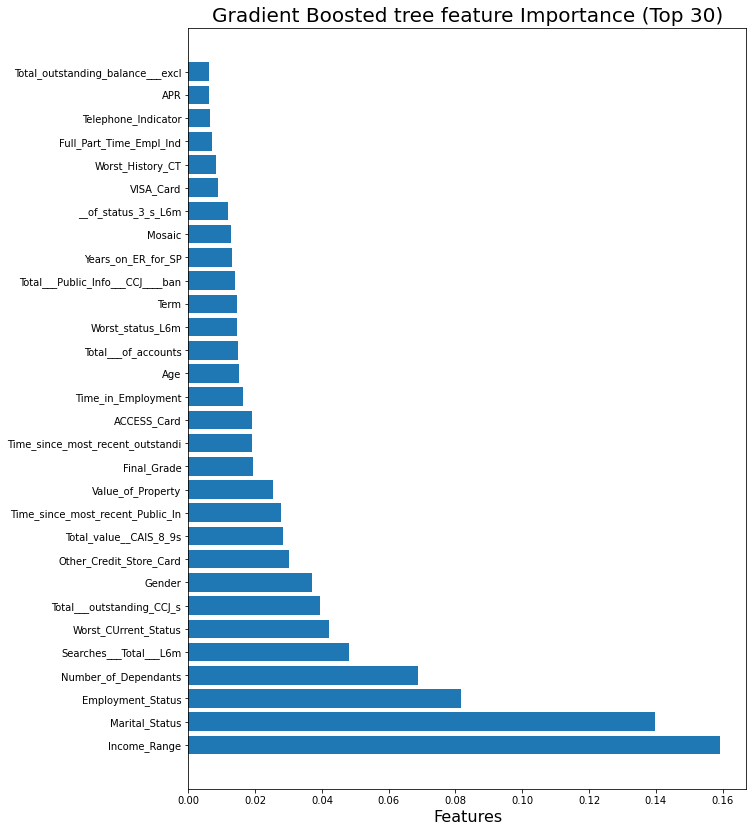

In [36]:
# Plot the top 30 feature importance
feature_names_25 = [i[0] for i in feature_importances_ranked[:30]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:30]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Gradient Boosted tree feature Importance (Top 30)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [34]:
pip install eli5

     |████████████████████████████████| 112kB 5.5MB/s 


In [35]:
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction

perm = PermutationImportance(gbt_classifier, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0177 ± 0.0080,Employment_Status
0.0036 ± 0.0062,Total_value__CAIS_8_9s
0.0026 ± 0.0038,Age
0.0026 ± 0.0042,Loan_Type
0.0019 ± 0.0036,Total_outstanding_balance___excl
0.0017 ± 0.0012,VISA_Card
0.0017 ± 0.0039,Total___of_accounts
0.0006 ± 0.0012,CIFAS_detected
0.0006 ± 0.0032,Total_Outstanding_Balances
0.0005 ± 0.0009,Diners_Card
